In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [6]:
k2_planets = pd.read_csv('k2candidates_2021.03.27_23.08.30.csv')

In [7]:
k2_planets.head(5)

,loc_rowid,epic_name,epic_candname,pl_name,k2c_refdisp,k2c_reflink,k2c_disp,k2c_note,k2_campaign,k2c_recentflag,...,st_rad,st_raderr1,st_raderr2,st_radlim,st_kep,st_keperr,st_keplim,st_k2,st_k2err,st_k2lim
0,1,EPIC 201092629,EPIC 201092629.01,K2-241 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,CONFIRMED,NaN,10.0,1,...,NaN,NaN,NaN,NaN,11.858,NaN,0.0,9.933,0.023,0.0
1,2,EPIC 201102594,EPIC 201102594.01,K2-242 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,CONFIRMED,NaN,10.0,1,...,NaN,NaN,NaN,NaN,15.615,NaN,0.0,11.777,0.024,0.0
2,3,EPIC 201110617,EPIC 201110617.01,K2-156 b,CONFIRMED,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,CONFIRMED,NaN,10.0,0,...,0.62,0.02,-0.02,0.0,12.947,NaN,0.0,10.391,0.023,0.0
3,4,EPIC 201110617,EPIC 201110617.01,K2-156 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,CONFIRMED,NaN,10.0,1,...,NaN,NaN,NaN,NaN,12.947,NaN,0.0,10.391,0.023,0.0
4,5,EPIC 201111557,EPIC 201111557.01,NaN,CANDIDATE,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,CANDIDATE,NaN,10.0,0,...,0.71,0.02,-0.02,0.0,11.363,NaN,0.0,9.220,0.019,0.0


In [102]:
k2_confirmed = k2_planets.copy()
k2_confirmed = k2_confirmed[k2_confirmed.k2c_refdisp.str.contains('CONFIRMED')]
k2_candidate = k2_planets.copy()
k2_candidate = k2_candidate[k2_candidate.k2c_refdisp.str.contains('CANDIDATE')]

In [103]:
k2_confirmed.columns

Index(['loc_rowid', 'epic_name', 'epic_candname', 'pl_name', 'k2c_refdisp',
       'k2c_reflink', 'k2c_disp', 'k2c_note', 'k2_campaign', 'k2c_recentflag',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim',
       'pl_ratdor', 'pl_ratdorerr1', 'pl_ratdorerr2', 'pl_ratdorlim',
       'pl_ratror', 'pl_ratrorerr1', 'pl_ratrorerr2', 'pl_ratrorlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_kep', 'st_keperr',
       'st_keplim', 'st_k2', 'st_k2err', 'st_k2lim'],
      dtype='object')

In [104]:
k2_candidate.iloc[0]

loc_rowid                                                         5
epic_name                                            EPIC 201111557
epic_candname                                     EPIC 201111557.01
pl_name                                                         NaN
k2c_refdisp                                               CANDIDATE
k2c_reflink       <a refstr=MAYO_ET_AL__2018 href=https://ui.ads...
k2c_disp                                                  CANDIDATE
k2c_note                                                        NaN
k2_campaign                                                    10.0
k2c_recentflag                                                    0
pl_orbper                                                  2.302368
pl_orbpererr1                                              0.000105
pl_orbpererr2                                             -0.000103
pl_orbperlim                                                    0.0
pl_tranmid                                      

In [68]:
k2_confirmed.iloc[0]

loc_rowid                                                         1
epic_name                                            EPIC 201092629
epic_candname                                     EPIC 201092629.01
pl_name                                                    K2-241 b
k2c_refdisp                                               CONFIRMED
k2c_reflink       <a refstr=LIVINGSTON_ET_AL__2018 href=https://...
k2c_disp                                                  CONFIRMED
k2c_note                                                        NaN
k2_campaign                                                    10.0
k2c_recentflag                                                    1
pl_orbper                                                   26.8199
pl_orbpererr1                                               0.00245
pl_orbpererr2                                              -0.00247
pl_orbperlim                                                    0.0
pl_tranmid                                      

In [95]:
confirmed_orbper = k2_confirmed.filter(['pl_name','pl_orbper'], axis=1)
confirmed_orbper = confirmed_orbper.astype({'pl_name': str, 'pl_orbper': np.float})
print(confirmed_orbper['pl_orbper'].mean())

46.51033398045721


In [96]:
confirmed_orbper = confirmed_orbper[confirmed_orbper['pl_orbper'] <= 365]
print(f'{confirmed_orbper.shape[0]} exoplanets with orbital periods less than or equal to 1 year long.')
print(f'{k2_confirmed.shape[0] - confirmed_orbper.shape[0]} exoplanets with orbital periods more than 1 year long.')
print(confirmed_orbper['pl_orbper'].mean())

2554 exoplanets with orbital periods less than or equal to 1 year long.
28 exoplanets with orbital periods more than 1 year long.
9.819868698508223


In [100]:
candidate_orbper = k2_candidate.filter(['pl_name','pl_orbper'], axis=1)
candidate_orbper = candidate_orbper.astype({'pl_name': str, 'pl_orbper': np.float})
print(candidate_orbper['pl_orbper'].mean())
candidate_orbper = candidate_orbper[candidate_orbper['pl_orbper'] <= 365]
print(candidate_orbper['pl_orbper'].mean())

46.51033398045721
9.819868698508223


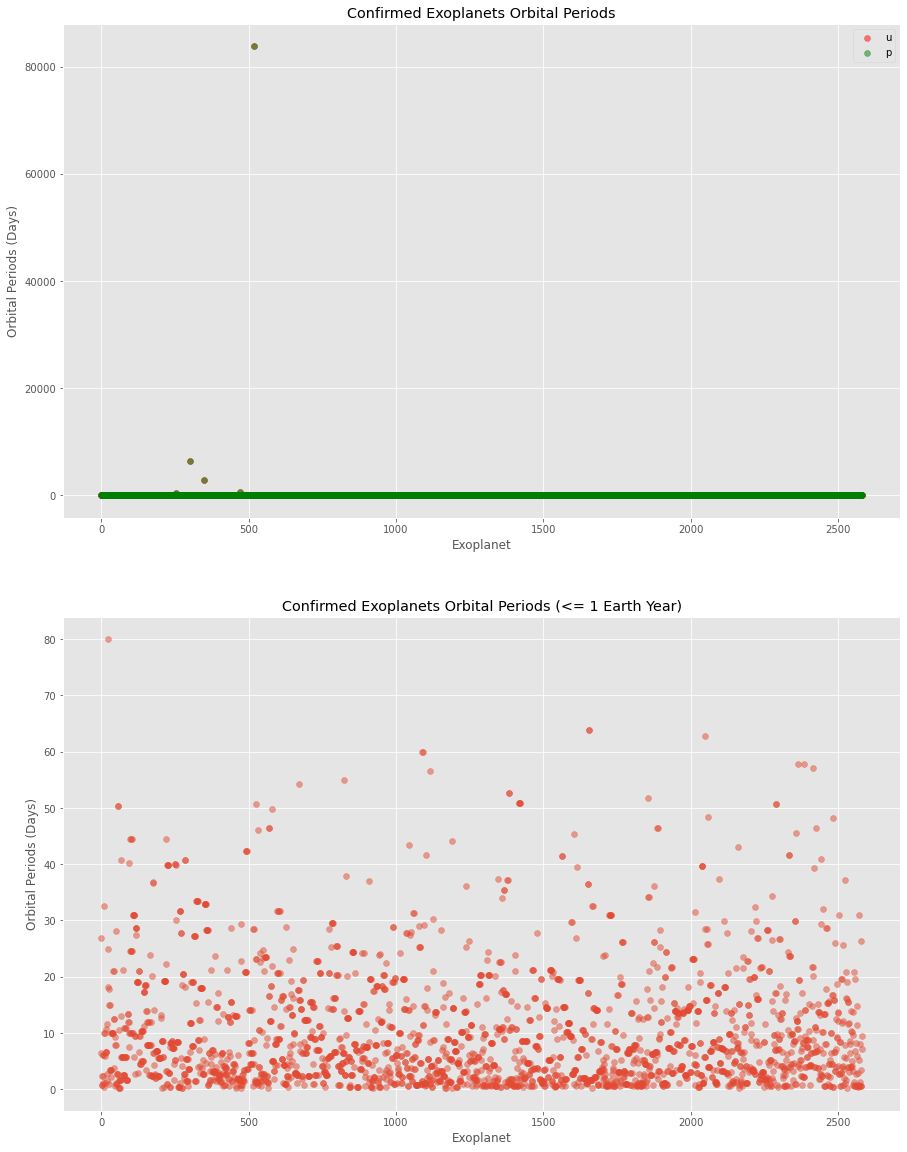

In [99]:
fig, ax = plt.subplots(2, figsize=(15, 20))

ax[0].scatter(x=k2_confirmed.index, y=k2_confirmed.loc[:, 'pl_orbper'], color='r', marker ='o', alpha=0.5, label='confirmed')
ax[0].scatter(x=k2_candidate.index, y=k2_candidate.loc[:, 'pl_orbper'], color='b', marker ='o', alpha=0.5, label='candidate')
ax[0].set_title("Confirmed Exoplanets Orbital Periods")
ax[0].set_ylabel('Orbital Periods (Days)')
ax[0].set_xlabel('Exoplanet')
ax[1].scatter(x=confirmed_orbper.index, y=confirmed_orbper.loc[:,'pl_orbper'], marker ='o', alpha=0.5)
ax[1].set_title("Confirmed Exoplanets Orbital Periods (<= 1 Earth Year)")
ax[1].set_ylabel('Orbital Periods (Days)')
ax[1].set_xlabel('Exoplanet')
ax[0].legend('upper right')

plt.show()

In [92]:
confirmed_radius = k2_confirmed.filter(['pl_name','pl_rade'], axis=1)
confirmed_radius = confirmed_radius.astype({'pl_name': str, 'pl_rade': np.float16})
print(confirmed_radius['pl_rade'].mean(skipna=True))
jupiter_radius = 11.2
confirmed_radius = confirmed_radius[confirmed_radius['pl_rade'] <= jupiter_radius]

10.766


In [84]:
print(f'{confirmed_radius.shape[0]} exoplanets smaller than or equal to Jupiter.')
print(f'{k2_confirmed.shape[0] - confirmed_radius.shape[0]} exoplanets larger than Jupiter.')

1564 exoplanets smaller than or equal to Jupiter.
1018 exoplanets larger than Jupiter.


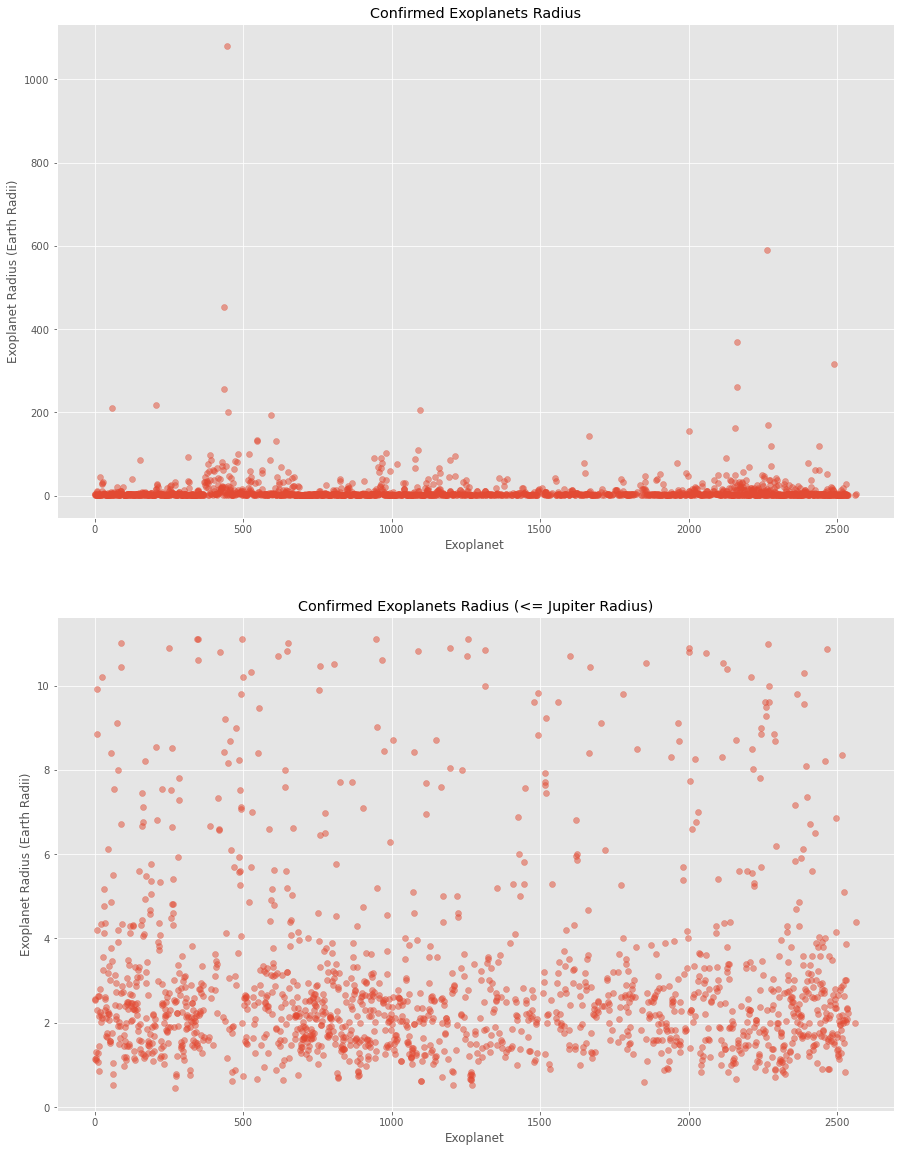

In [87]:
fig, ax = plt.subplots(2, figsize = (15, 20))

ax[0].scatter(x=k2_confirmed.index, y=k2_confirmed.loc[:, 'pl_rade'], marker ='o', alpha=0.5)
ax[0].set_title("Confirmed Exoplanets Radius")
ax[0].set_ylabel('Exoplanet Radius (Earth Radii)')
ax[0].set_xlabel('Exoplanet')
ax[1].scatter(x=confirmed_radius.index, y=confirmed_radius.loc[:,'pl_rade'], marker ='o', alpha=0.5)
ax[1].set_title("Confirmed Exoplanets Radius (<= Jupiter Radius)")
ax[1].set_ylabel('Exoplanet Radius (Earth Radii)')
ax[1].set_xlabel('Exoplanet')
plt.show()

In [88]:
confirmed_rad_sol_rad = k2_confirmed.filter(['pl_name','pl_ratror'], axis=1)
confirmed_rad_sol_rad = confirmed_rad_sol_rad.astype({'pl_name': str, 'pl_ratror': np.float16})
jupiter_rad_sol_rad = 0.1
confirmed_rad_sol_rad = confirmed_rad_sol_rad[confirmed_rad_sol_rad['pl_ratror'] <= jupiter_rad_sol_rad]